# Random data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

**Load data from CSV file**

In [3]:
df1 = pd.read_csv('output_data_random.csv')
df1.head()

,0.00,0.00.1,0.00.2
0,1.0,0.28,1.08
1,2.0,1.47,13.57
2,3.0,1.96,3.08
3,4.0,3.91,26.36
4,5.0,2.56,5.85


**Pre-processing**


First set the columns names

In [5]:
df1.columns=['x1','x2','x3']
df1.head()

,x1,x2,x3
0,1.0,0.28,1.08
1,2.0,1.47,13.57
2,3.0,1.96,3.08
3,4.0,3.91,26.36
4,5.0,2.56,5.85


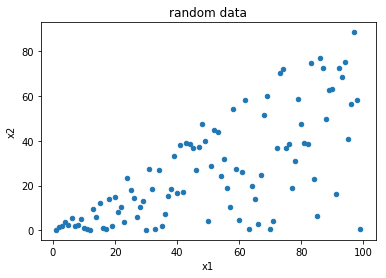

In [24]:
plotdf1=df1.plot(x ='x1', y='x2', title='random data' ,kind = 'scatter')	
plt.savefig('plotdf1')

**Normalizing over the standard deviation**

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [10]:
from sklearn.preprocessing import StandardScaler
X = df1.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.12388373, -0.82381183],
       [-1.07307315, -0.75565719],
       [-1.05215115, -0.81289836],
       [-0.96889012, -0.68586552],
       [-1.02653237, -0.7977832 ],
       [-0.90356223, -0.78850674],
       [-1.0572749 , -0.67435181],
       [-1.02909425, -0.77404639],
       [-0.90953995, -0.69896169],
       [-1.09613005, -0.71080281],
       [-1.11064736, -0.71314921],
       [-1.12473769, -0.64035634],
       [-0.7259387 , -0.73672231],
       [-0.88776399, -0.7434341 ],
       [-0.6170589 , -0.71844224],
       [-1.08289368,  2.68366948],
       [-1.10680454, -0.73344827],
       [-0.53038203, -0.41908566],
       [-1.05514   , -0.64554024],
       [-0.49579668, -0.44904314],
       [-0.79340149, -0.64886885],
       [-0.6798249 , -0.63091618],
       [-0.98340743, -0.35791564],
       [-0.1367068 , -0.66343833],
       [-0.3715456 , -0.63680946],
       [-0.51586472, -0.63397196],
       [-0.88392117, -0.58256949],
       [-0.68067886, -0.67680734],
       [-0.56923718,

**Modeling**

Using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.


In [11]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 0 2
 0 2 2 2 2 2 2 2 2 1 0 0 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 0 2
 2 0 2 2 2 0 2 0 2 2 0 1 0 0 2 2 0 2 0 0 0 2 0 0 0]


**Insights**

We assign the labels to each row in dataframe.

In [12]:
df1["Clus_km"] = labels
df1.head()

,x1,x2,x3,Clus_km
0,1.0,0.28,1.08,2
1,2.0,1.47,13.57,2
2,3.0,1.96,3.08,2
3,4.0,3.91,26.36,2
4,5.0,2.56,5.85,2


We can easily check the centroid values by averaging the features in each cluster.

In [13]:
df1.groupby('Clus_km').mean()

,x1,x2,x3
Clus_km,,,
0,75.130435,37.574348,294.516957
1,45.500000,29.022500,846.582500
2,42.222222,22.962083,67.956667


Now, lets look at the distribution

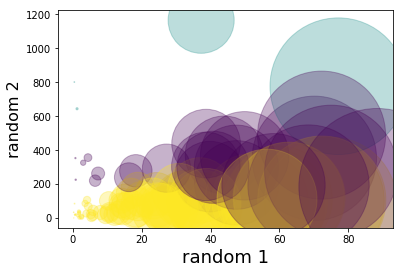

In [19]:
area = np.pi * ( X[:, 0])**2  
plt.scatter(X[:, 0], X[:, 1], s=area, c=labels.astype(np.float), alpha=0.3)
plt.xlabel('random 1', fontsize=18)
plt.ylabel('random 2', fontsize=16)

plt.show()

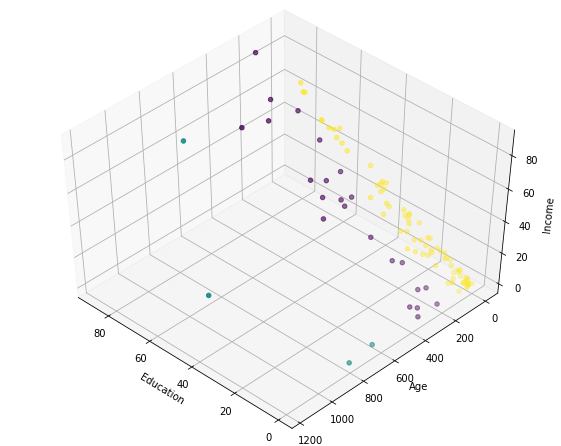

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 0], X[:, 1], X[:, 0], c= labels.astype(np.float))